In [18]:
import pandas as pd

data = pd.read_csv('spambase.data', header=None)

print(data.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [19]:
# Add column names
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total", "spam"
]

# Load the dataset and assign the column names
data = pd.read_csv('spambase.data', header=None, names=column_names)

# Display the first few rows to confirm column names have been added
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

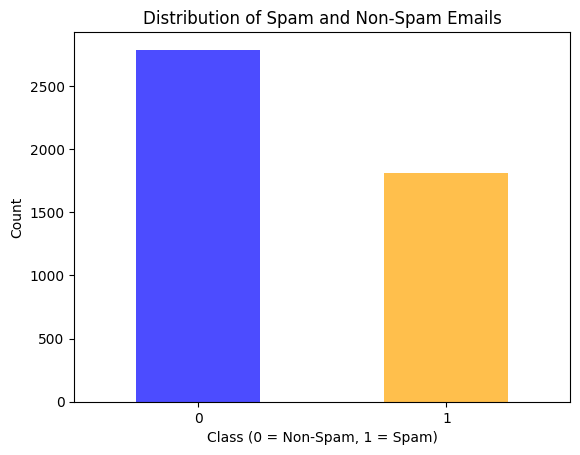

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (0 and 1)
spam_counts = data["spam"].value_counts()

# Create a bar plot
spam_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Class (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Get correlations with the 'spam' column and sort them
spam_correlations = correlation_matrix["spam"].sort_values(ascending=False)

# Display the sorted correlations
print(spam_correlations)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [22]:
# Dropping columns with a correlation of less than .1 to prevent any interference

# Calculate the correlation of all columns with 'spam'
correlation_with_spam = correlation_matrix["spam"]

# Select columns with correlation greater than or equal to 0.1 (absolute value)
columns_to_keep = correlation_with_spam[correlation_with_spam.abs() >= 0.1].index

# Filter the dataset to keep only the relevant columns
filtered_data = data[columns_to_keep]

# Display the filtered DataFrame
print(filtered_data.head())

   word_freq_make  word_freq_all  word_freq_our  word_freq_over  \
0            0.00           0.64           0.32            0.00   
1            0.21           0.50           0.14            0.28   
2            0.06           0.71           1.23            0.19   
3            0.00           0.00           0.63            0.00   
4            0.00           0.00           0.63            0.00   

   word_freq_remove  word_freq_internet  word_freq_order  word_freq_mail  \
0              0.00                0.00             0.00            0.00   
1              0.21                0.07             0.00            0.94   
2              0.19                0.12             0.64            0.25   
3              0.31                0.63             0.31            0.63   
4              0.31                0.63             0.31            0.63   

   word_freq_receive  word_freq_people  ...  word_freq_meeting  \
0               0.00              0.00  ...                0.0   
1       

In [23]:
# Check to see if filtered the data correctly

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Get correlations with the 'spam' column and sort them
spam_correlations = correlation_matrix["spam"].sort_values(ascending=False)

# Display the sorted correlations
print(spam_correlations)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_415            

In [24]:
# Check for any null values in filtered_data
if filtered_data.isnull().values.any():
    print("There are null values in the dataset.")
    # Optionally, print the rows with null values
    print(filtered_data[filtered_data.isnull().any(axis=1)])
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [25]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_data.drop(columns=['spam'])  # Features: all columns except 'spam'
y = filtered_data['spam']  # Target variable: 'spam'

# First split: Train (60%) and (Validation + Test) (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: Split the 40% into Validation and Test (50% Validation, 50% Test from X_temp and y_temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shape of each dataset
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2760, 42)
Validation data shape: (920, 42)
Testing data shape: (921, 42)


In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initialise the Multinomial Naive Bayes model
nbc_model = MultinomialNB()

nbc_model = MultinomialNB(alpha=1.0)

# Fit the model to the training data
nbc_model.fit(X_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the training set
train_preds = nbc_model.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, train_preds)
print(f"Training Accuracy: {accuracy}")

# Classification report (includes precision, recall, F1-score)
report = classification_report(y_train, train_preds)
print("Classification Report:")
print(report)


Training Accuracy: 0.7525362318840579
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1699
           1       0.68      0.69      0.68      1061

    accuracy                           0.75      2760
   macro avg       0.74      0.74      0.74      2760
weighted avg       0.75      0.75      0.75      2760



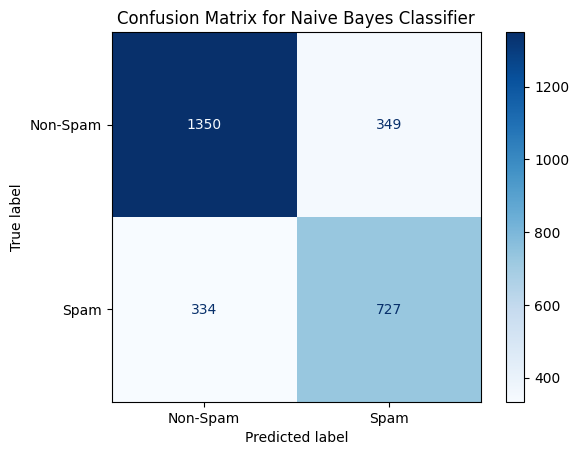

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_train, train_preds)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Spam', 'Spam'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
test_preds = nbc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_preds)
print(f"Testing Accuracy: {accuracy}")

# Classification report (includes precision, recall, F1-score)
report = classification_report(y_test, test_preds)
print("Classification Report:")
print(report)

Testing Accuracy: 0.755700325732899
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       537
           1       0.72      0.68      0.70       384

    accuracy                           0.76       921
   macro avg       0.75      0.74      0.75       921
weighted avg       0.75      0.76      0.75       921



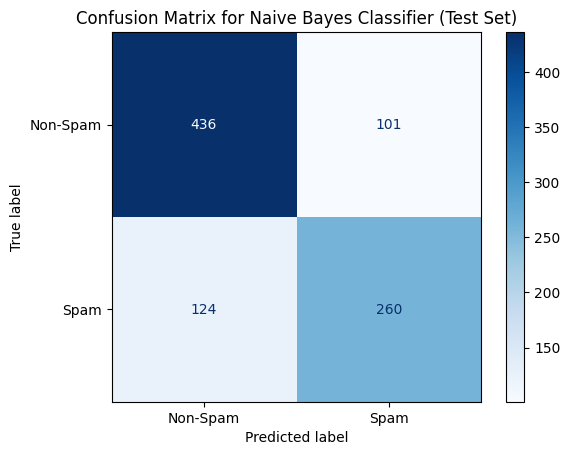

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test, test_preds)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Spam', 'Spam'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier (Test Set)')
plt.show()